In [1]:
!pip install matplotlib
import numpy as np
import functools
import pandas as pd
from sklearn import decomposition
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression

In [2]:
D = 50   # number of dimensions
N = D*8 # population size

In [3]:
loc = np.ones(D) # mean/location >> np.zeros(D), np.ones(D)
scale = 1.0 # variance/scale
size = (N,D)
population = np.random.normal(loc=loc, scale=scale, size=size)

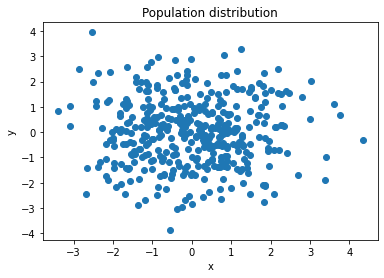

In [4]:
if D > 2:
    pca = decomposition.PCA(n_components=2)
    mapping = pca.fit_transform(population)
    x = mapping[:,0]
    y = mapping[:,1]
else:
    x = population[:,0]
    y = population[:,1]
plt.scatter(x, y)
plt.title("Population distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
class ValueFunctions:
    def quadratic(point):
        return functools.reduce(lambda ret, atr: ret + atr*atr, point, 0) / D
        
def evaluate(point, func = ValueFunctions.quadratic):
    return func(point)

globalOptimum = np.zeros(D)

In [6]:
def getCentralPoint(population):
    return np.mean(population, axis=0)

In [7]:
getCentralPoint([[1,1],[1,3],[5,5]])

array([2.33333333, 3.        ])

In [8]:
def getSequence(population):
    def sortByValue(point):
        return evaluate(point)
    tmpPopulation = sorted(population.copy(), key=sortByValue)
    centroidSequence = []
    while len(tmpPopulation):
        centroidSequence.append(getCentralPoint(tmpPopulation))
        # print(evaluate(tmpPopulation[-1]))
        del tmpPopulation[-1]
    return np.array(centroidSequence)

In [9]:
centroidSequence = getSequence(population)
index = np.linspace(0,1,N)
cmap = plt.cm.Greens
color = cmap(index)

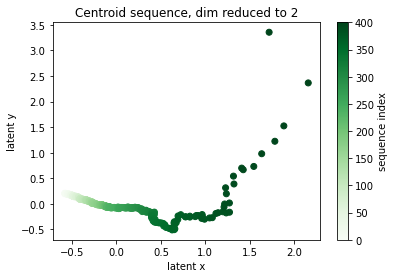

In [10]:
if D > 2:
    pca = decomposition.PCA(n_components=2)
    mapping = pca.fit_transform(centroidSequence)
    x = mapping[:,0]
    y = mapping[:,1]
else:
    x = centroidSequence[:,0]
    y = centroidSequence[:,1]
plt.scatter(x, y, c=color)
plt.title("Centroid sequence, dim reduced to 2")
plt.xlabel("latent x")
plt.ylabel("latent y")
norm = mpl.colors.Normalize(vmin=0, vmax=N)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), label='sequence index')
plt.show()

In [11]:
df = pd.DataFrame({
    'x': centroidSequence[:,0],
    'y': centroidSequence[:,1],
    'value': map(evaluate, centroidSequence),
    'dist_from_opt': map(lambda point: np.linalg.norm(point - globalOptimum), centroidSequence)
})

In [12]:
df

,x,y,value,dist_from_opt
0,0.967732,1.091936,1.006943,7.095572
1,0.969356,1.094146,1.005314,7.089830
2,0.969870,1.089593,1.003689,7.084099
3,0.968225,1.093012,1.002399,7.079546
4,0.964514,1.090626,1.001005,7.074619
...,...,...,...,...
395,1.202936,0.745933,0.765712,6.187537
396,1.356365,0.561134,0.782840,6.256355
397,1.260221,0.991403,0.821846,6.410328
398,1.653251,0.944969,0.919545,6.780653


In [13]:
samples = index.reshape(-1,1)
estimator_point = []
for i in range(D):
    targets = centroidSequence[:, i].copy().reshape(-1,1)
    regression_model = LinearRegression().fit(samples, targets)
    estimator_point.append(regression_model.predict([[1]])[0][0])

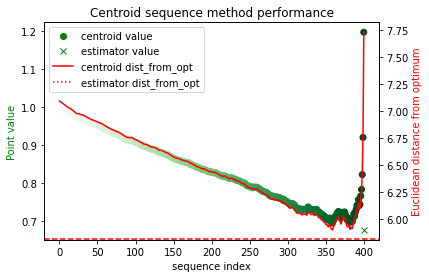

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

vc = mlines.Line2D([], [], color='g', marker='o', linestyle='None')
ve = mlines.Line2D([], [], color='g', marker='x', linestyle='None')
dc = mlines.Line2D([], [], color='r')
de = mlines.Line2D([], [], color='r', linestyle='dotted')

plt.title('Centroid sequence method performance')
ax1.set_xlabel('sequence index')
ax1.set_ylabel('Point value', color='g')
ax1.scatter(index*N, df.value, c=color, label='centroid')
ax1.plot(N, evaluate(estimator_point), 'gx', label='estimator')
ax2.set_ylabel('Euclidean distance from optimum', color='r')
ax2.plot(index*N, df.dist_from_opt, color='r', label='centroid')
ax2.axhline(y=np.linalg.norm(estimator_point - globalOptimum), color='r', linestyle='dashed', label='estimator')
# plt.legend()
plt.legend(handles=[vc,ve,dc,de], labels=['centroid value', 'estimator value', 'centroid dist_from_opt', 'estimator dist_from_opt'])
plt.show()